In [4]:

import cv2
import os
import zipfile


In [2]:
# Definisikan path untuk data train dan data validation

base_dir = 'output'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

In [16]:
train_dir

'output\\train'

In [3]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [4]:
train_data

array([[[[ 35,  35,  35],
         [ 32,  32,  32],
         [ 26,  26,  26],
         ...,
         [124, 124, 124],
         [115, 115, 115],
         [107, 107, 107]],

        [[ 40,  40,  40],
         [ 31,  31,  31],
         [ 27,  27,  27],
         ...,
         [120, 120, 120],
         [117, 117, 117],
         [104, 104, 104]],

        [[ 39,  39,  39],
         [ 34,  34,  34],
         [ 27,  27,  27],
         ...,
         [122, 122, 122],
         [118, 118, 118],
         [104, 104, 104]],

        ...,

        [[ 43,  43,  43],
         [ 38,  38,  38],
         [ 44,  44,  44],
         ...,
         [ 30,  30,  30],
         [ 36,  36,  36],
         [ 30,  30,  30]],

        [[ 40,  40,  40],
         [ 42,  42,  42],
         [ 43,  43,  43],
         ...,
         [ 34,  34,  34],
         [ 32,  32,  32],
         [ 34,  34,  34]],

        [[ 40,  40,  40],
         [ 38,  38,  38],
         [ 41,  41,  41],
         ...,
         [ 33,  33,  33],
        

In [4]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

In [5]:
# Gather data validation
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(val_data)
test_label = np.array(val_label)

In [7]:
test_label

array(['NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL',
       'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'NORMAL', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA', 'PNEUMONIA', 'PNEUMONIA'], dtype='<U9')

### **Data Preprocessing**

In [6]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (4684, 150, 150, 3)
Train Label =  (4684,)
Validation Data =  (1111, 150, 150, 3)
Validation Label =  (1111,)


In [7]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [35 35 35]
Data setelah di-normalisasi  [0.13725491 0.13725491 0.13725491]


In [8]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)
y_test =  lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'NORMAL']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]


### **Menerapkan Data Augmentation**

Untuk melakukan image augmentation, kita perlu memanggil fungsi ImageDataGenerator. Kemudian, kita lakukan duplikasi dan manipulasi untuk tiap image yang ada pada dataset. Manipulasi yang kita lakukan pada praktikum kali ini ialah:
1.   Rotasi image +-30 derajat secara random
2.   Geser image secara horizontal dan vertikal dengan faktor 0.1
3.   Potong image sebesar 0.2
4.   Perbesar dengan pengambilan sampel secara seragam dalam kisaran [0,8, 1,2]
5.   Flip (balik) secara horizontal

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2, 
                        zoom_range=0.8, horizontal_flip=True,
                        fill_mode="nearest")

### **Mendefinisikan Model dengan Data Augmentation**

In [1]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, Dropout

In [2]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Dropout(0.25))
model.add(Flatten())

# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile model
from tensorflow.keras.optimizers import SGD,Adam

model.compile(optimizer=Adam(lr=0.001, decay=0.001/147), # decay = learning_rate / batch_size 
              loss='binary_crossentropy', 
              metrics=['acc'])

C:\Users\ROG\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [3]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 150, 150, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 38, 38, 64)        1

In [14]:
H = model.fit_generator(aug.flow(x_train, y_train), verbose=1,
                        validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
147/147 [==============================] - 50s 332ms/step - loss: 0.6264 - acc: 0.7491 - val_loss: 6.0731 - val_acc: 0.7300
Epoch 2/100
147/147 [==============================] - 50s 340ms/step - loss: 0.4459 - acc: 0.7788 - val_loss: 8.4105 - val_acc: 0.7300
Epoch 3/100
147/147 [==============================] - 49s 334ms/step - loss: 0.4191 - acc: 0.7950 - val_loss: 1.9087 - val_acc: 0.7300
Epoch 4/100
147/147 [==============================] - 50s 339ms/step - loss: 0.4012 - acc: 0.8237 - val_loss: 0.3853 - val_acc: 0.7957
Epoch 5/100
147/147 [==============================] - 49s 336ms/step - loss: 0.3751 - acc: 0.8337 - val_loss: 0.2419 - val_acc: 0.9109
Epoch 6/100
147/147 [==============================] - 50s 339ms/step - loss: 0.3911 - acc: 0.8350 - val_loss: 0.3391 - val_acc: 0.8758
Epoch 7/100
147/147 [==============================] - 52s 354ms/step - loss: 0.3668 - acc: 0.8482 - val_loss: 0.2373 - val_acc: 0.9226
Epoch 8/100
147/147 [===========================

Epoch 61/100
147/147 [==============================] - 75s 507ms/step - loss: 0.2491 - acc: 0.9084 - val_loss: 0.3396 - val_acc: 0.8542
Epoch 62/100
147/147 [==============================] - 78s 529ms/step - loss: 0.2671 - acc: 0.8975 - val_loss: 0.6191 - val_acc: 0.6247
Epoch 63/100
147/147 [==============================] - 76s 515ms/step - loss: 0.2501 - acc: 0.9065 - val_loss: 0.1710 - val_acc: 0.9379
Epoch 64/100
147/147 [==============================] - 74s 505ms/step - loss: 0.2468 - acc: 0.9056 - val_loss: 0.1820 - val_acc: 0.9244
Epoch 65/100
147/147 [==============================] - 76s 516ms/step - loss: 0.2476 - acc: 0.9073 - val_loss: 0.3763 - val_acc: 0.8236
Epoch 66/100
147/147 [==============================] - 75s 512ms/step - loss: 0.2566 - acc: 0.9018 - val_loss: 0.1817 - val_acc: 0.9334
Epoch 67/100
147/147 [==============================] - 76s 518ms/step - loss: 0.2442 - acc: 0.9063 - val_loss: 0.1712 - val_acc: 0.9478
Epoch 68/100
147/147 [===================

In [13]:
model = load_model('Model_CNN3.h5')

# Check its architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 150, 150, 16)      448       
_________________________________________________________________
batch_normalization_3 (Batch (None, 150, 150, 16)      64        
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
batch_normalization_4 (Batch (None, 75, 75, 32)        128       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 38, 38, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 38, 38, 64)       

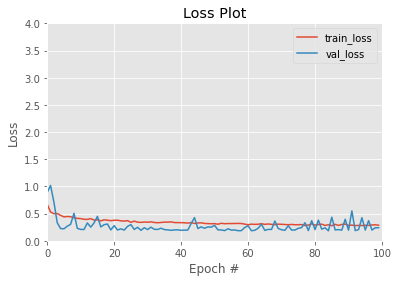

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.axis([0, 100, 0, 4])
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

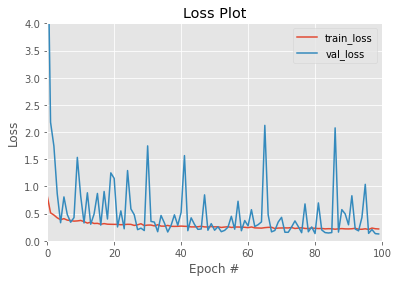

In [22]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.axis([0, 100, 0, 4])
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

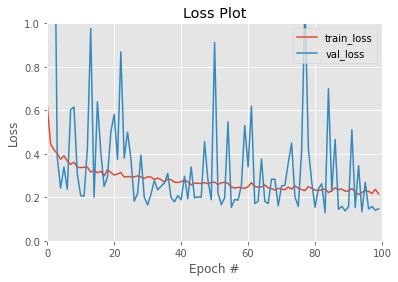

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.axis([0, 100, 0, 1])
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [10]:
from keras.preprocessing import image

X_test = []
labels = []

labels_dict = {
    "NORMAL" : 0,
    "PNEUMONIA" : 1,
}

filepath = test_dir

for file in os.listdir(filepath):
    
    if file in labels_dict.keys():
        
        for img_path in os.listdir(os.path.join(filepath, file)):
            
            img = image.load_img(os.path.join(filepath, file, img_path), target_size=(150,150))
            img = image.img_to_array(img)/255.0
            
            X_test.append(img)
            labels.append(labels_dict[file])

X_test = np.array(X_test)

In [17]:
X_test

array([[[[0.35686275, 0.35686275, 0.35686275],
         [0.37254903, 0.37254903, 0.37254903],
         [0.38431373, 0.38431373, 0.38431373],
         ...,
         [0.3647059 , 0.3647059 , 0.3647059 ],
         [0.34509805, 0.34509805, 0.34509805],
         [0.3137255 , 0.3137255 , 0.3137255 ]],

        [[0.34509805, 0.34509805, 0.34509805],
         [0.3372549 , 0.3372549 , 0.3372549 ],
         [0.3882353 , 0.3882353 , 0.3882353 ],
         ...,
         [0.34901962, 0.34901962, 0.34901962],
         [0.3372549 , 0.3372549 , 0.3372549 ],
         [0.30588236, 0.30588236, 0.30588236]],

        [[0.33333334, 0.33333334, 0.33333334],
         [0.36862746, 0.36862746, 0.36862746],
         [0.38039216, 0.38039216, 0.38039216],
         ...,
         [0.3647059 , 0.3647059 , 0.3647059 ],
         [0.33333334, 0.33333334, 0.33333334],
         [0.30588236, 0.30588236, 0.30588236]],

        ...,

        [[0.07058824, 0.07058824, 0.07058824],
         [0.07058824, 0.07058824, 0.07058824]

In [ ]:
for m in model_list:
    model = load_model(m)
    size_img = model.layers[0].output_shape[1:3]
    imgs = cv2.resize(img, size_img)
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0)[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')

In [54]:
filepath

'output\\test'

In [31]:
from sklearn.metrics import classification_report, confusion_matrix
pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))
print(labels)

              precision    recall  f1-score   support

           0       0.92      0.85      0.89       300
           1       0.95      0.97      0.96       811

    accuracy                           0.94      1111
   macro avg       0.93      0.91      0.92      1111
weighted avg       0.94      0.94      0.94      1111

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


In [16]:
print("Evaluate on test data")
results = model.evaluate(x_test, y_test, batch_size=147)
print("test loss, test acc:", results)

Evaluate on test data
8/8 [==============================] - 2s 269ms/step - loss: 0.1477 - acc: 0.9406
test loss, test acc: [0.1476706713438034, 0.9405940771102905]


In [32]:
pred

array([[0.03586671],
       [0.02123573],
       [0.09081033],
       ...,
       [0.7758671 ],
       [0.9987942 ],
       [0.92663383]], dtype=float32)

In [1]:
from tensorflow import keras
model =keras.models.load_model("Model_CNN3.h5")

Model : Model_CNN3.h5
Predicted Label : Pneumonia
Probability : 0.9996

1


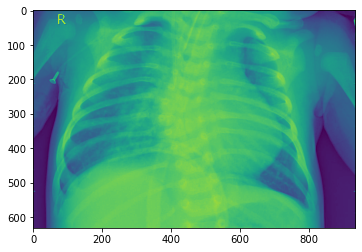

In [3]:
from PIL import Image
from tensorflow.keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
img_upload = Image.open("output/test/PNEUMONIA/person38_bacteria_192.jpeg")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

model_list = ['Model_CNN3.h5']
labels = ['Normal', 'Pneumonia']

for m in model_list:
    model = load_model(m)
    size_img = model.layers[0].output_shape[1:3]
    imgs = cv2.resize(img, size_img)
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')
    print(((pred > 0.5)+0).ravel()[0])

Model : Model_CNN3.h5
Predicted Label : Normal
Probability : 0.1579



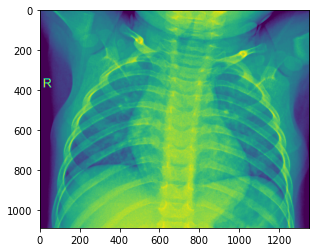

In [6]:
from PIL import Image
from tensorflow.keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import numpy as np
import cv2
img_upload = Image.open("output/test/NORMAL/NORMAL2-IM-1194-0001.jpeg")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

model_list = ['Model_CNN3.h5']
labels = ['Normal', 'Pneumonia']

for m in model_list:
    model = load_model(m)
    size_img = model.layers[0].output_shape[1:3]
    imgs = cv2.resize(img, size_img)
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')

In [6]:
from keras.preprocessing import image

X_test = []
labels = []

labels_dict = {
    "NORMAL" : 0,
    "PNEUMONIA" : 1,
}

filepath = test_dir

for file in os.listdir(filepath):
    
    if file in labels_dict.keys():
        
        for img_path in os.listdir(os.path.join(filepath, file)):
            
            img = image.load_img(os.path.join(filepath, file, img_path), target_size=(150,150))
            img = image.img_to_array(img)/255.0
            
            X_test.append(img)
            labels.append(labels_dict[file])

X_test = np.array(X_test)

NameError: name 'test_dir' is not defined

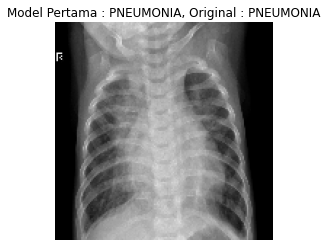

training time:  0.12501978874206543 s
PNEUMONIA


1

In [23]:
rev_label_dict = dict([(value, key) for (key, value) in labels_dict.items()])

import random
import time
import matplotlib.pyplot as plt
start = time.time()
idx = random.randint(0, len(X_test))
plt.imshow(X_test[idx])
plt.axis("off")
pred = rev_label_dict.get(np.int(np.where(np.array(model.predict(X_test[idx].reshape(1,150,150,3))) > 0.5, 1, 0 )))
org = rev_label_dict.get(labels[idx])
plt.title("Model Pertama : {}, Original : {}".format(pred, org))
plt.show()
End = time.time()

print ("training time: ", End-start,"s")
print(pred)
nilai=np.int(np.where(np.array(model.predict(X_test[idx].reshape(1,150,150,3))) > 0.5, 1, 0 ))
nilai

In [ ]:

def predict_result(model, run_time, probs, img):
    class_list = {'NORMAL': 0, 'PNEUMONIA': 1}
    idx_pred = probs.index(max(probs))
    labels = list(class_list.keys())
    return render_template('/result_select.html', labels=labels, 
                            probs=probs, model=model, pred=idx_pred, 
                            run_time=run_time, img=img)

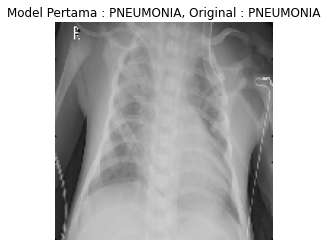

training time:  0.12051820755004883 s
PNEUMONIA


1

In [47]:
rev_label_dict = dict([(value, key) for (key, value) in labels_dict.items()])

import random
import time
start = time.time()
idx = random.randint(0, len(X_test))
plt.imshow(X_test[idx])
plt.axis("off")
pred = rev_label_dict.get(np.int(np.where(np.array(model.predict(X_test[idx].reshape(1,150,150,3))) > 0.5, 1, 0 )))
org = rev_label_dict.get(labels[idx])
plt.title("Model Pertama : {}, Original : {}".format(pred, org))
plt.show()
End = time.time()

print ("training time: ", End-start,"s")
print(pred)
nilai=np.int(np.where(np.array(model.predict(X_test[idx].reshape(1,150,150,3))) > 0.5, 1, 0 ))
nilai

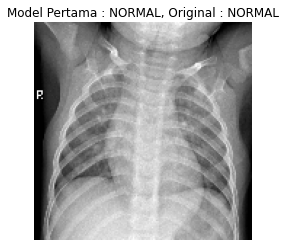

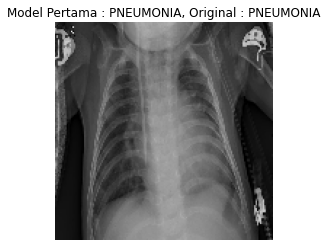

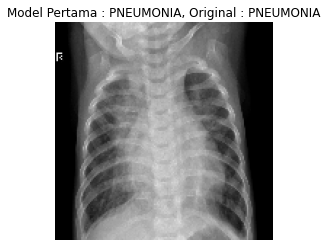

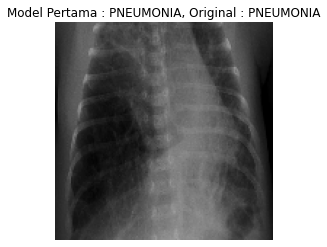

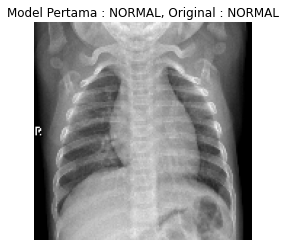

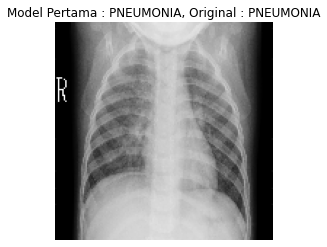

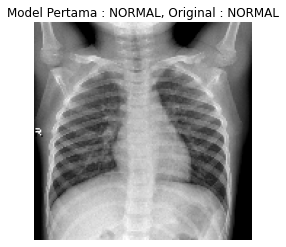

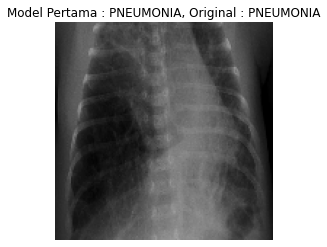

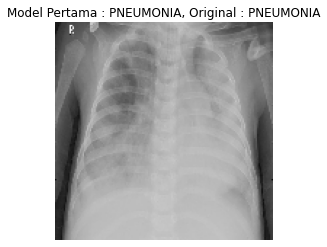

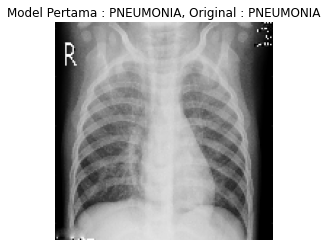

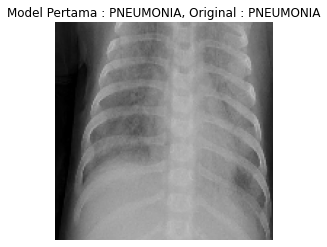

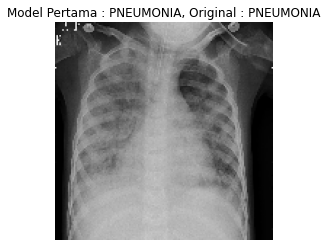

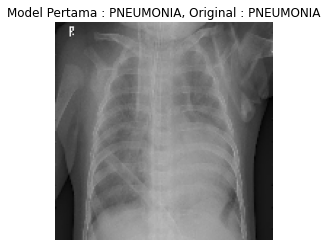

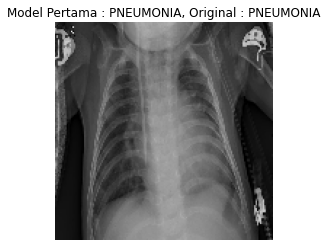

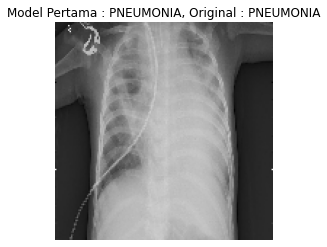

training time:  0.12551450729370117 s


'PNEUMONIA'

In [18]:
rev_label_dict = dict([(value, key) for (key, value) in labels_dict.items()])

import random
import time
for i in range(15):
    start = time.time()
    idx = random.randint(0, len(X_test))
    plt.imshow(X_test[idx])
    plt.axis("off")
    pred = rev_label_dict.get(np.int(np.where(np.array(model.predict(X_test[idx].reshape(1,150,150,3))) > 0.5, 1, 0 )))
    org = rev_label_dict.get(labels[idx])
    plt.title("Model Pertama : {}, Original : {}".format(pred, org))
    plt.show()
    End = time.time()

print ("training time: ", End-start,"s")
rev_label_dict.get(np.int(np.where(np.array(model.predict(X_test[idx].reshape(1,150,150,3))) > 0.5, 1, 0 )))

In [46]:
model.predict(X_test[idx].reshape(1,150,150,3))

array([[0.31806922]], dtype=float32)

In [21]:
np.argmax(model.predict(X_test[idx].reshape(1,150,150,3)))

0

In [80]:
test=X_test[2].reshape(1,150,150,3)

In [81]:
x_test

array([[[[0.14117648, 0.14117648, 0.14117648],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         ...,
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.13725491, 0.13725491, 0.13725491],
         [0.12941177, 0.12941177, 0.12941177]],

        [[0.11764706, 0.11764706, 0.11764706],
         [0.11764706, 0.11764706, 0.11764706],
         [0.11764706, 0.11764706, 0.11764706],
         ...,
         [0.11764706, 0.11764706, 0.11764706],
         [0.11372549, 0.11372549, 0.11372549],
         [0.12156863, 0.12156863, 0.12156863]],

        [[0.13333334, 0.13333334, 0.13333334],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         ...,
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.1254902 , 0.1254902 , 0.1254902 ],
         [0.1254902 , 0.1254902 , 0.1254902 ]],

        ...,

        [[0.12156863, 0.12156863, 0.12156863],
         [0.10588235, 0.10588235, 0.10588235]

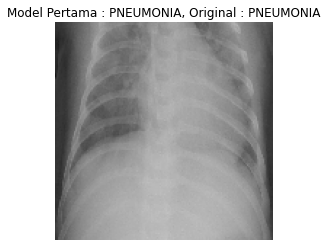

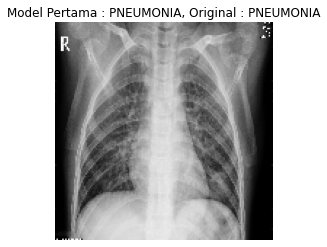

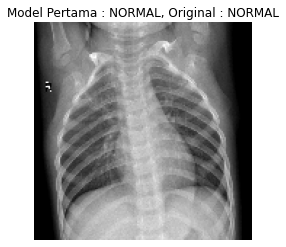

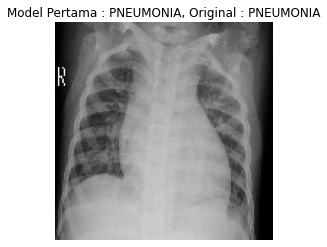

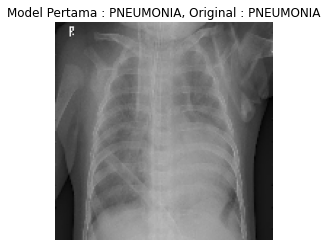

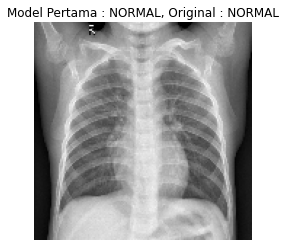

training time:  0.11023879051208496 s
0


In [17]:
rev_label_dict = dict([(value, key) for (key, value) in labels_dict.items()])

import random
import time
for i in range(6):
    start = time.time()
    idx = random.randint(0, len(X_test))
    plt.imshow(X_test[idx])
    plt.axis("off")
    pred = rev_label_dict.get(np.int(np.where(np.array(model.predict(X_test[idx].reshape(1,150,150,3))) > 0.5, 1, 0 )))
    org = rev_label_dict.get(labels[idx])
    plt.title("Model Pertama : {}, Original : {}".format(pred, org))
    plt.show()
    End = time.time()

print ("training time: ", End-start,"s")
print(np.int(np.where(np.array(model.predict(X_test[idx].reshape(1,150,150,3))) > 0.5, 1, 0 )))

In [33]:
test_gen = aug.flow_from_directory(
    test_dir,
    class_mode = 'categorical',
    shuffle=False,
    target_size = (150,150),
    batch_size=32,
    color_mode ='rgb',
)

Found 61 images belonging to 2 classes.


In [34]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [38]:
test_gen.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [44]:
val_label

array(['NORMAL', 'NORMAL', 'NORMAL', ..., 'PNEUMONIA', 'PNEUMONIA',
       'PNEUMONIA'], dtype='<U9')

In [46]:
import warnings
warnings.filterwarnings('always')  # "error", "ignore", "always", "default", "module" or "once"

In [37]:
from google.colab import files

uploads = files.upload()

for fn in uploads.keys():
    path = fn
    img_src = image.load_img(path, target_size=(224, 224))
    imgplot = plt.imshow(img_src)
    x = image.img_to_array(img_src)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model2.predict(images, batch_size=20)

    print(fn)
    if classes[0, 0] == 1:
        print('rock')
    elif classes[0, 1] == 1:
        print('paper')
    elif classes[0, 2] == 1:
        print('scissors')

ModuleNotFoundError: No module named 'google.colab'

In [21]:
model.save("Model_CNN3.h5")

Dari grafik loss di atas, terlihat generalization gap antara train loss dan validation loss menyempit. Akan tetapi, model ini masih kurang baik karena penurunan nilai loss di tiap epoch masih terlalu kecil. Hal ini diakibatkan nilai learning rate yang terlalu kecil. Coba lakukan percobaan dengan memperbesar nilai learning rate agar penurunan nilai loss tidak terlalu landai.

# **Overfitting Handling** 
**Bagian A :** Variation of Overfitting and Underfitting Handling Techniques #4
* Transfer Learning

Di modul-modul sebelumnya, kita sudah belajar bagaimana cara membuat arsitektur CNN dari awal (*from scratch*). Membuat arsitektur sendiri memang lebih fleksibel. Kita dapat menambah dan mengurangi layer semau kita. Akan tetapi, membuat arsitektur sendiri kadangkala juga merepotkan. Karena kita harus mengatur (melakukan tuning) terhadap begitu banyak parameter. Ada cara yang lebih baik dalam membuat model deep learning menggunakan metode CNN, yakni dengan memanfaatkan model yang telah dibuat oleh peneliti sebelumnya. Model-model ini terbukti mampu menghasilkan nilai akurasi dan nilai error yang baik, serta menduduki peringkat atas di beberapa kompetisi. Beberapa model sudah disediakan oleh library Keras, dan kita hanya tinggal menggunakannya. Proses menggunakan kembali model yang sudah ada, untuk dipasang di dataset yang berbeda, dikenal dengan istilah **Transfer Learning**






---



---



# Langkah Praktikum

<h3>Load Dataset</h3>

In [ ]:
# Download dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-09-06 07:35:08--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 2607:f8b0:400e:c08::80, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  90.8MB/s    in 0.7s    

2021-09-06 07:35:09 (90.8 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
# Ekstrak dataset

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
# Definisikan path untuk data train dan data validation

base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

Karena model yang nantinya kita gunakan cukup kompleks, maka untuk mempersingkat waktu training, kita akan mengecilkan ukuran image yang ada di dataset menjadi 50 x 50

In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (50,50))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (50,50))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [ ]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (2000, 50, 50, 3)
Train Label =  (2000,)
Validation Data =  (1000, 50, 50, 3)
Validation Label =  (1000,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [255 255 255]
Data setelah di-normalisasi  [1. 1. 1.]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['cats' 'cats' 'cats' 'cats' 'cats' 'dogs' 'dogs' 'dogs' 'dogs' 'dogs']
Label setelah di-encoder  [0 0 0 0 0 1 1 1 1 1]


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                        height_shift_range=0.1, shear_range=0.2, 
                        zoom_range=0.8, horizontal_flip=True,
                        fill_mode="nearest")

<h3>Definisikan Model</h3>

Dalam transfer learning, ada beberapa teknik yang bisa digunakan. Diantaranya:
*   *Direct Used* (Langsung menggunakan model dan bobot yang ada)
*   *Network Surgery* (Menggunakan arsitektur dan bobot yang sama untuk Feature Extracted Layer, akan tetapi membuat Fully Connected Layer sendiri, dan melakukan training bobot khusus untuk Fully Connected Layer tersebut)
*   *Learning from Scratch* (Menggunakan arsitektur dari model sebelumnya, tapi tidak menggunakan bobotnya. Sehingga bobot harus ditraining ulang menggunakan dataset kita sendiri)
*   Gabungan dari ketiganya

Pada praktikum kali ini, kita akan mencoba menggunakan teknik *Network Surgery*. Dimana kita akan menggunakan Feature Extracted Layer dari model sebelumnya (disini kita akan menggunakan "VGG16"), kemudian kita pasangkan dengan Fully Connected Layer yang kita buat sendiri.

In [61]:
# Pertama, kita import dulu library yang dibutuhkan
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Input
from tensorflow.keras.applications.vgg16 import VGG16

In [84]:
# Kita load model VGG16, kemudian kita potong bagian Top atau Fully Connected Layernya
baseModel = VGG16(include_top=False, input_tensor=Input(shape=(150, 150, 3)), weights= 'imagenet')

In [83]:
baseModel.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

Bisa dilihat di model.summary() di atas, VGG16 memiliki total 19 layer pada Feature Extraction Layer-nya. Serta memiliki 14,7 juta parameter yang harus ditrain. Akan tetapi, disini kita akan menggunakan bobot default milik VGG16. Bobot ini telah dilatih sebelumnya menggunakan dataset 'imagenet'. Dataset ini berisi kumpulan data image yang jumlahnya jutaan. Sehingga, kita tidak perlu melatihnya kembali.

Berikutnya, kita akan mendefinisikan Fully Conected Layer kita sendiri. Layer ini nantinya akan kita pasangkan dengan Feature Extraction Layer milik VGG16

In [64]:
class FCHeadNet:
  def build(baseModel, classes, D):
    headModel = baseModel.output
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(D, activation='relu')(headModel)
    headModel = Dropout(0.7)(headModel)
    headModel = Dense(D, activation='relu')(headModel)
    headModel = Dropout(0.7)(headModel)
    headModel = Dense(classes, activation='sigmoid')(headModel)
    return headModel

In [65]:
headModel = FCHeadNet.build(baseModel, 1, 256)
model = Model(inputs=baseModel.input, outputs=headModel)

Agar nantinya model hanya perlu melakukan train pada bobot yang terdapat pada Fully Connected Layer, maka kita perlu membekukan (*Freeze*) Feature Extraction Layer milik VGG16 menggunakan code di bawah

In [66]:
for layer in baseModel.layers:
  layer.trainable = False

In [67]:
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0   

Dalam model.summary() di atas, terlihat bahwa parameter yang *trainable* hanya parameter milik Fully Connected Layer, sedangkan bobot-bobot lain yang merupakan bawaan dari VGG16 tidak ikut dilatih.

Kemudian, kita tinggal mengcompile dan melatih model tersebut

In [68]:
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=1e-3), 
              loss='binary_crossentropy', 
              metrics=['acc'])

C:\Users\ROG\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [41]:
H = model.fit_generator(aug.flow(x_train, y_train),steps_per_epoch = 50,
                        validation_data=(x_val, y_val), epochs=30)

Epoch 1/30
50/50 [==============================] - 118s 2s/step - loss: 0.0000e+00 - acc: 0.7319 - val_loss: 0.0000e+00 - val_acc: 0.7300
Epoch 2/30
50/50 [==============================] - 121s 2s/step - loss: 0.0000e+00 - acc: 0.7373 - val_loss: 0.0000e+00 - val_acc: 0.7300
Epoch 3/30
50/50 [==============================] - 121s 2s/step - loss: 0.0000e+00 - acc: 0.7272 - val_loss: 0.0000e+00 - val_acc: 0.7300
Epoch 4/30
50/50 [==============================] - 121s 2s/step - loss: 0.0000e+00 - acc: 0.7325 - val_loss: 0.0000e+00 - val_acc: 0.7300
Epoch 5/30
50/50 [==============================] - 126s 3s/step - loss: 0.0000e+00 - acc: 0.7256 - val_loss: 0.0000e+00 - val_acc: 0.7300
Epoch 6/30
50/50 [==============================] - 120s 2s/step - loss: 0.0000e+00 - acc: 0.7306 - val_loss: 0.0000e+00 - val_acc: 0.7300
Epoch 7/30
50/50 [==============================] - 120s 2s/step - loss: 0.0000e+00 - acc: 0.7362 - val_loss: 0.0000e+00 - val_acc: 0.7300
Epoch 8/30
50/50 [=========

In [69]:
H1 = model.fit_generator(aug.flow(x_train, y_train),steps_per_epoch = 50,
                        validation_data=(x_val, y_val), epochs=30)

C:\Users\ROG\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
50/50 [==============================] - 117s 2s/step - loss: 0.8153 - acc: 0.6619 - val_loss: 0.5226 - val_acc: 0.8974
Epoch 2/30
50/50 [==============================] - 120s 2s/step - loss: 0.5230 - acc: 0.7419 - val_loss: 0.4441 - val_acc: 0.9082
Epoch 3/30
50/50 [==============================] - 121s 2s/step - loss: 0.4626 - acc: 0.7734 - val_loss: 0.3997 - val_acc: 0.8875
Epoch 4/30
50/50 [==============================] - 122s 2s/step - loss: 0.4818 - acc: 0.7576 - val_loss: 0.3509 - val_acc: 0.8929
Epoch 5/30
50/50 [==============================] - 122s 2s/step - loss: 0.4621 - acc: 0.7696 - val_loss: 0.3343 - val_acc: 0.8992
Epoch 6/30
50/50 [==============================] - 122s 2s/step - loss: 0.4617 - acc: 0.7861 - val_loss: 0.3095 - val_acc: 0.8938
Epoch 7/30
50/50 [==============================] - 123s 2s/step - loss: 0.4592 - acc: 0.7658 - val_loss: 0.3353 - val_acc: 0.8857
Epoch 8/30
50/50 [==============================] - 123s 2s/step - loss: 0.4268 - a

In [70]:
model.save('VGG16_ver2.h5')

<h3>Evaluasi Model</h3>

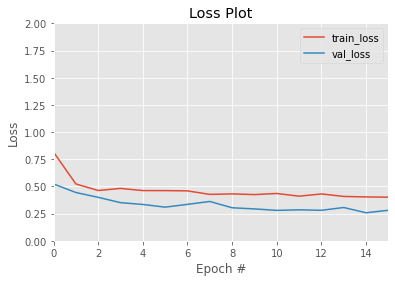

In [71]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.axis([0, 15, 0, 2])
plt.plot(np.arange(0, 30), H1.history["loss"], label="train_loss")
plt.plot(np.arange(0, 30), H1.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

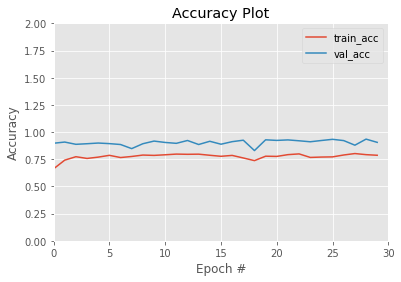

In [74]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.axis([0, 30, 0, 2])
plt.plot(np.arange(0, 30), H1.history["acc"], label="train_acc")
plt.plot(np.arange(0, 30), H1.history["val_acc"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [73]:
from sklearn.metrics import classification_report

pred = model.predict(x_val)
labels = (pred > 0.5).astype(np.int)

print(classification_report(y_val, labels))

              precision    recall  f1-score   support

           0       0.76      0.95      0.84       300
           1       0.98      0.89      0.93       811

    accuracy                           0.91      1111
   macro avg       0.87      0.92      0.89      1111
weighted avg       0.92      0.91      0.91      1111



<h3>Save & Load Model</h3>

Untuk menyimpan model beserta bobot yang sudah kita definisikan sebelumnya, kita cukup mengetikkan code berikut:

In [77]:
model_json = model.to_json()
with open("modelJsonvgg16ver1.json", "w") as json_file:
    json_file.write(model_json)

In [81]:
from tensorflow.keras.models import model_from_json

# Simpan model dalam file Json

model.save_weights("modelWeightvgg16ver1.h5")
print("Model saved successfully")

print('. . . . .  . . . . . .')

# Load json model
json_file = open('modelJsonvgg16ver1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load bobot model
loaded_model.load_weights("modelWeightvgg16ver1.h5")
print("Loaded model from disk")
 
# evaluasi loaded json model
loaded_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
score = loaded_model.evaluate(x_val, y_val, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Model saved successfully
. . . . .  . . . . . .
Loaded model from disk
accuracy: 90.55%


error: OpenCV(4.5.3) :-1: error: (-5:Bad argument) in function 'resize'
> Overload resolution failed:
>  - Can't parse 'dsize'. Expected sequence length 2, got 0
>  - Can't parse 'dsize'. Expected sequence length 2, got 0


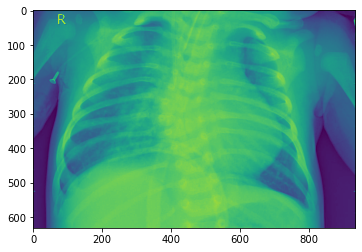

In [8]:
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
import cv2
img_upload = Image.open("output/test/PNEUMONIA/person38_bacteria_192.jpeg")
img_plt = plt.imshow(img_upload)
img = np.array(img_upload)
img = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2RGB)

model_list = ['vgg16_ver2.h5']
labels = ['Normal', 'Pneumonia']

for m in model_list:
    model = load_model(m)
    size_img = model.layers[0].output_shape[1:3] 
    imgs = cv2.resize(img, size_img)
    imgs = imgs.astype('float32') / 255
    pred = model.predict(np.expand_dims(imgs, axis=0))[0]
    print('Model :', m.split('/')[-1])
    print('Predicted Label :',labels[((pred > 0.5)+0).ravel()[0]])
    print('Probability :',[ round(elem, 4) for elem in pred ][0])
    print('===============\n')

In [9]:
dir1 = ['output/train/NORMAL/',
        'output/val/NORMAL/',
        'output/test/NORMAL/',
        'output/train/PNEUMONIA/',
        'output/val/PNEUMONIA/',
        'output/test/PNEUMONIA/']

In [13]:
model1 = load_model('vgg16_ver2.h5')
model2 = load_model('Model_CNN3.h5')

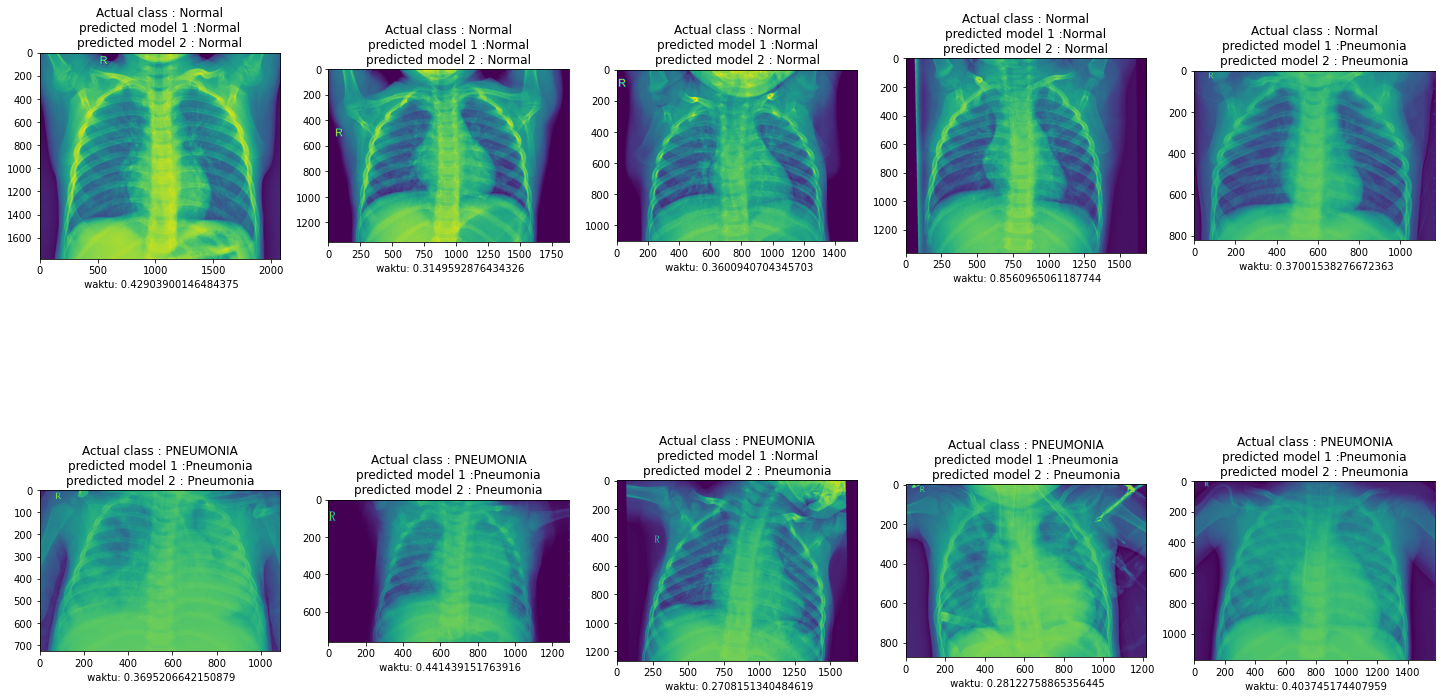

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time
from PIL import Image
import os

def preprocess(img,input_size):
    nimg = img.convert('RGB').resize(input_size, resample= 0)
    img_arr = (np.array(nimg))/255
    return img_arr

def reshape(imgs_arr):
    return np.stack(imgs_arr, axis=0)


nrows = 2
ncols = 5
input_size = (150, 150)
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 7)

pic_index += 10
melanoma_pix = [os.path.join(dir1[2], fname) for fname in os.listdir(dir1[2])[:5]]
benign_pix = [os.path.join(dir1[5], fname) for fname in os.listdir(dir1[5])[:5]]

for i, img_path in enumerate(melanoma_pix+benign_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)

    labels = ['Normal', 'Pneumonia']
    im = Image.open(img_path)
    X = preprocess(im,input_size)
    X = reshape([X])

    start = time.time()
    y = model.predict(X)
    z = model2.predict(X)
    waktu = time.time() - start

    if i < 5:
        plt.title('Actual class : Normal\n'+'predicted model 1 :'+labels[int(np.round(y, 0))]+ '\n' + 'predicted model 2 : ' +labels[int(np.round(z, 0))])
        plt.xlabel(' waktu: ' + str(waktu))
    else:
        plt.title('Actual class : PNEUMONIA\n'+'predicted model 1 :'+labels[int(np.round(y, 0))]+ '\n' + 'predicted model 2 : ' +labels[int(np.round(z, 0))])
        plt.xlabel(' waktu: ' + str(waktu))

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()
